In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r"C:\Users\doshi\Downloads\tested.csv")

In [42]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [43]:
df.shape

(418, 12)

In [44]:
df.duplicated().sum()

0

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [46]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Filling Missing Values

In [47]:
for i in df.select_dtypes(include="float64"):
    df[i].fillna(df[i].median(),inplace=True)

In [48]:
# DATA CLEANING
df["Ticket"].unique()

array(['330911', '363272', '240276', '315154', '3101298', '7538',
       '330972', '248738', '2657', 'A/4 48871', '349220', '694', '21228',
       '24065', 'W.E.P. 5734', 'SC/PARIS 2167', '233734', '2692',
       'STON/O2. 3101270', '2696', 'PC 17603', 'C 17368', 'PC 17598',
       'PC 17597', 'PC 17608', 'A/5. 3337', '113509', '2698', '113054',
       '2662', 'SC/AH 3085', 'C.A. 31029', 'C.A. 2315', 'W./C. 6607',
       '13236', '2682', '342712', '315087', '345768', '1601', '349256',
       '113778', 'SOTON/O.Q. 3101263', '237249', '11753',
       'STON/O 2. 3101291', 'PC 17594', '370374', '11813', 'C.A. 37671',
       '13695', 'SC/PARIS 2168', '29105', '19950', 'SC/A.3 2861',
       '382652', '349230', '348122', '386525', '349232', '237216',
       '347090', '334914', 'F.C.C. 13534', '330963', '113796', '2543',
       '382653', '349211', '3101297', 'PC 17562', '113503', '359306',
       '11770', '248744', '368702', '2678', 'PC 17483', '19924', '349238',
       '240261', '2660', '3308

In [49]:
l=[]
for i in df["Ticket"]:
    ticket=i.split(" ")
    if len(ticket)==1:
        l.append(ticket[0])
    elif len(ticket)==2:
        l.append(ticket[1])
    elif len(ticket)==3:
        l.append(ticket[2])
df["Ticket"]=l
df["Ticket"]=df["Ticket"].astype("int32")

In [50]:
df["Ticket"].unique()

array([ 330911,  363272,  240276,  315154, 3101298,    7538,  330972,
        248738,    2657,   48871,  349220,     694,   21228,   24065,
          5734,    2167,  233734,    2692, 3101270,    2696,   17603,
         17368,   17598,   17597,   17608,    3337,  113509,    2698,
        113054,    2662,    3085,   31029,    2315,    6607,   13236,
          2682,  342712,  315087,  345768,    1601,  349256,  113778,
       3101263,  237249,   11753, 3101291,   17594,  370374,   11813,
         37671,   13695,    2168,   29105,   19950,    2861,  382652,
        349230,  348122,  386525,  349232,  237216,  347090,  334914,
         13534,  330963,  113796,    2543,  382653,  349211, 3101297,
         17562,  113503,  359306,   11770,  248744,  368702,    2678,
         17483,   19924,  349238,  240261,    2660,  330844,   31416,
        364856,   29103,  347072,  345498,   12750,  376563,   13905,
        350033,   19877, 3101268,  347471,    3338,   11778,  228414,
        365235,  347

In [51]:
# DATA PREPROCESSING

df["Embarked"].replace(["S","C","Q"],["Southampton","Cherbourg","Queenstown"],inplace=True)
conditions = [
    ((df["Age"]>0) & (df["Age"]<13.0)),
    (df["Age"] >=13.0) & (df["Age"] <18.0),
    (df["Age"]>=18.0) & (df["Age"]<32.0),
    (df["Age"]>=32.0)& (df["Age"]<50.0),
    (df["Age"]>=50.0)]
values = ["Child","Teenage","Young","Mid-Age","Senior"]
df['Age Group'] = np.select(conditions, values)
df["Family"]=df["SibSp"]+df["Parch"]

# Data Visualisation

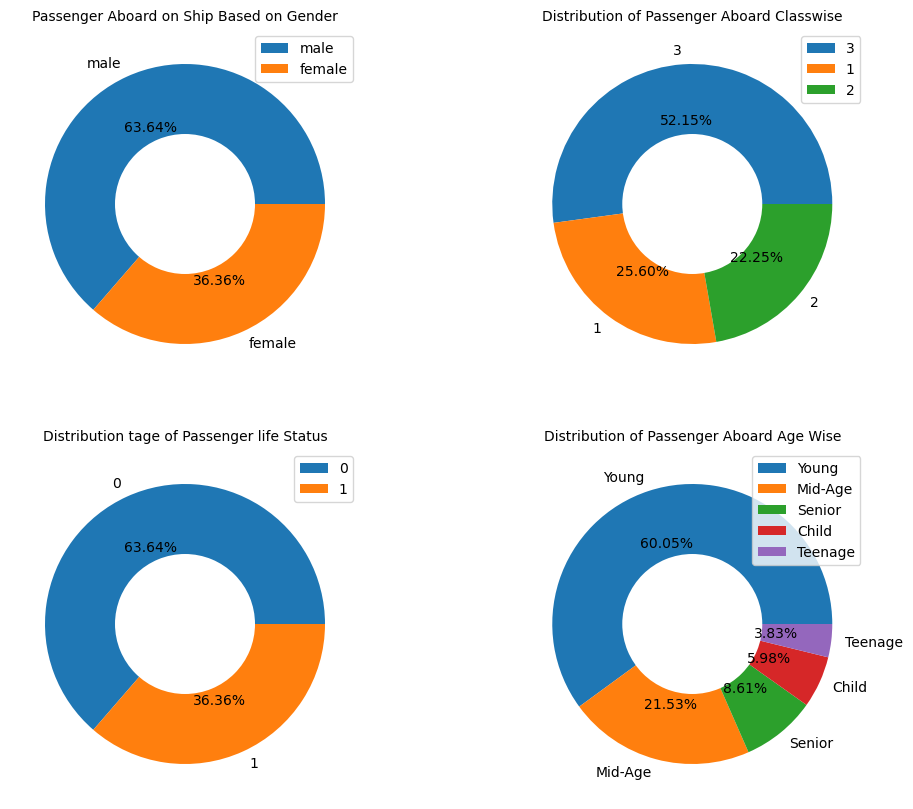

In [52]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.pie(x=df["Sex"].value_counts().values,labels=df["Sex"].value_counts().index,autopct="%0.2F%%")
plt.pie([1],radius=0.5,colors="white")
plt.title("Passenger Aboard on Ship Based on Gender",fontsize=10)
plt.legend(loc=1)

plt.subplot(2,2,2)
plt.pie(x=df["Pclass"].value_counts().values,labels=df["Pclass"].value_counts().index,autopct="%0.2F%%")
plt.pie([1],radius=0.5,colors="white")
plt.title("Distribution of Passenger Aboard Classwise",fontsize=10)
plt.legend(loc=1)

plt.subplot(2,2,3)
plt.pie(x=df["Survived"].value_counts().values,labels=df["Survived"].value_counts().index,autopct="%0.2F%%")
plt.pie([1],radius=0.5,colors="white")
plt.title("Distribution tage of Passenger life Status",fontsize=10)
plt.legend(loc=1)

plt.subplot(2,2,4)
plt.pie(x=df["Age Group"].value_counts().values,labels=df["Age Group"].value_counts().index,autopct="%0.2F%%")
plt.pie([1],radius=0.5,colors="white")
plt.title("Distribution of Passenger Aboard Age Wise",fontsize=10)
plt.legend(loc=1)

plt.show()

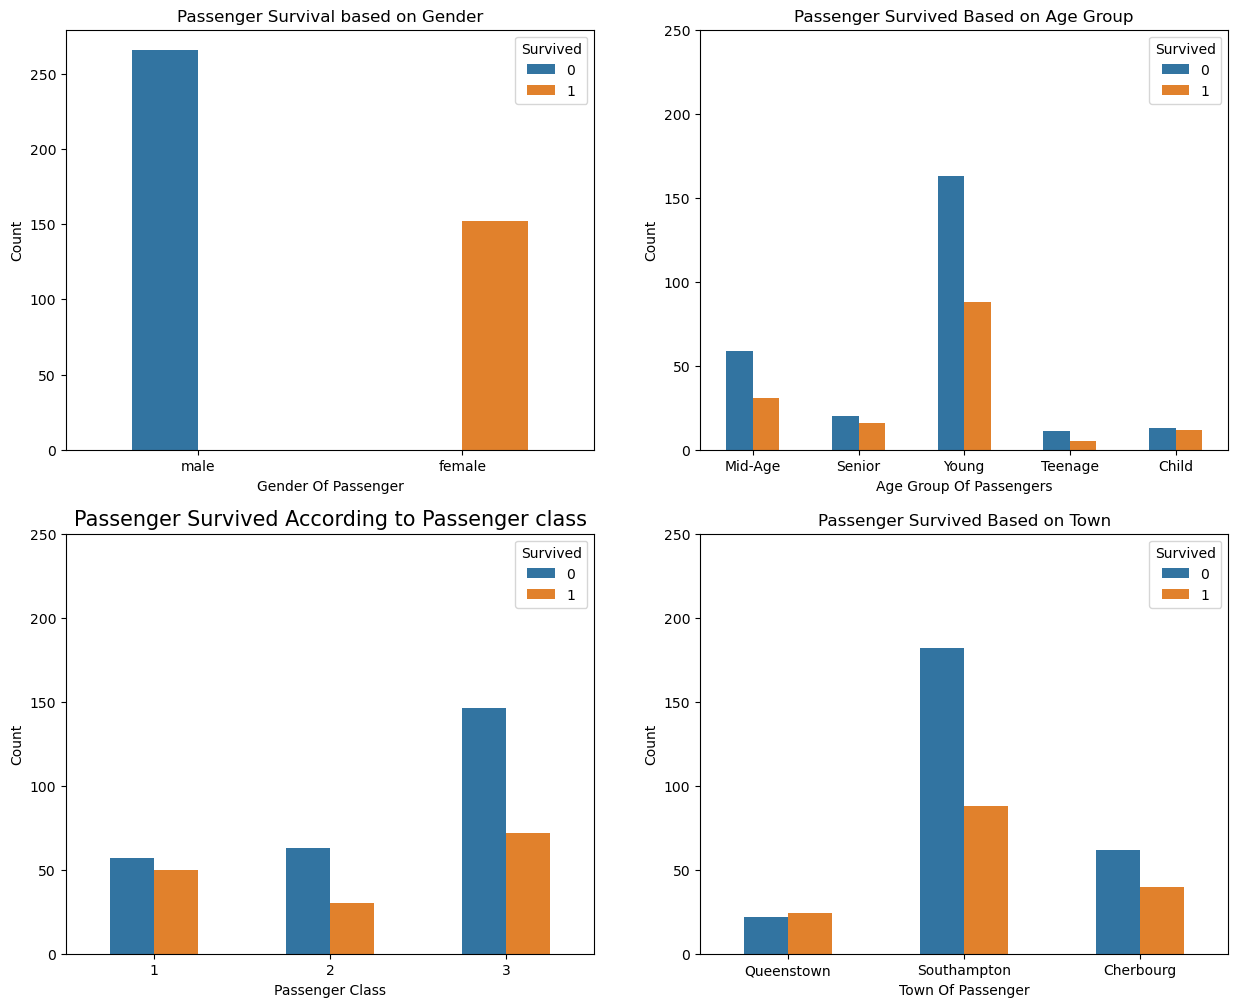

In [53]:
plt.figure(figsize=(15,12))
plt.subplot(2,2,1)
sns.countplot(x=df["Sex"],data=df,width=0.5,hue=df["Survived"])
plt.xlabel("Gender Of Passenger",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Passenger Survival based on Gender",fontsize=12)

plt.subplot(2,2,2)
sns.countplot(x=df["Age Group"],data=df,width=0.5,hue=df["Survived"])
plt.xlabel("Age Group Of Passengers",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Passenger Survived Based on Age Group")

plt.subplot(2,2,3)
sns.countplot(x=df["Pclass"],data=df,width=0.5,hue=df["Survived"])
plt.xlabel("Passenger Class",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Passenger Survived According to Passenger class",fontsize=15)
plt.yticks([i for i in range(0,300,50)])

plt.subplot(2,2,4)
sns.countplot(x=df["Embarked"],data=df,width=0.5,hue=df["Survived"])
plt.xlabel("Town Of Passenger",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Passenger Survived Based on Town")
plt.show()

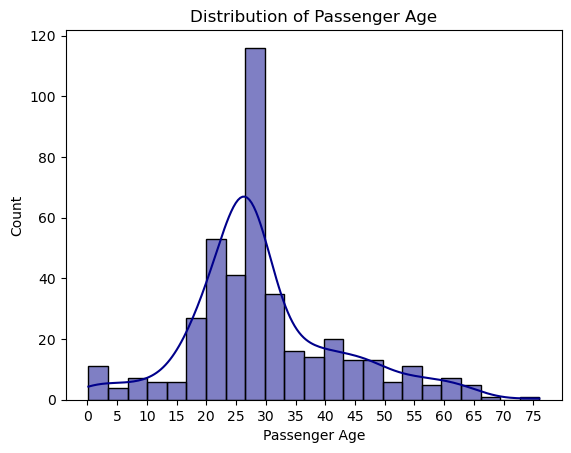

In [54]:
sns.histplot(x=df["Age"],data=df,kde=True,color="darkblue")
plt.xticks([i for i in range(0,80,5)])
plt.xlabel("Passenger Age",fontsize=10)
plt.title("Distribution of Passenger Age",fontsize=12)
plt.show()

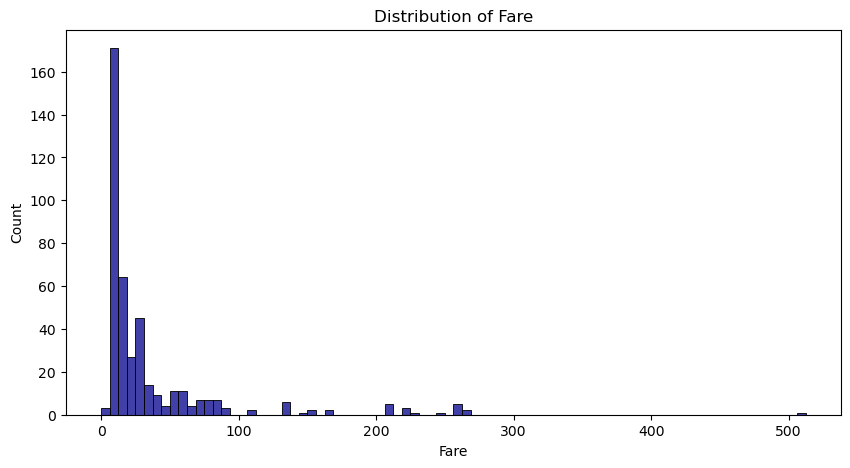

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(x=df["Fare"],data=df,color="darkblue")
plt.xlabel("Fare",fontsize=10)
plt.title("Distribution of Fare",fontsize=12)
plt.show()

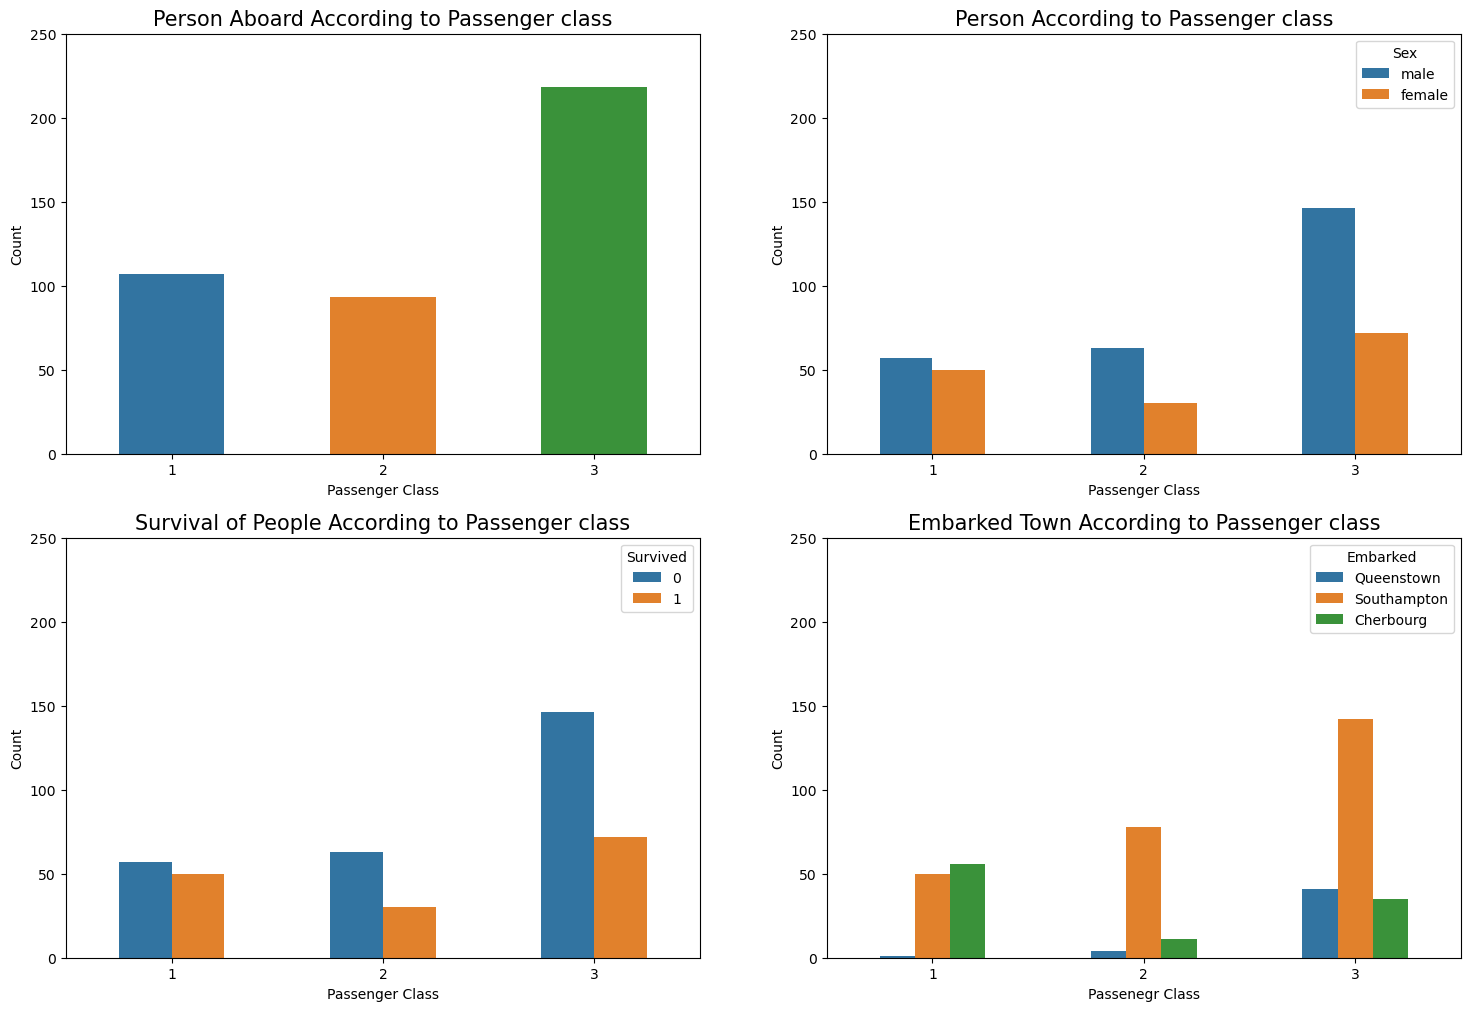

In [56]:
plt.figure(figsize=(18,12))
plt.subplot(2,2,1)
sns.countplot(x=df["Pclass"],data=df,width=0.5)
plt.xlabel("Passenger Class",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Person Aboard According to Passenger class",fontsize=15)

plt.subplot(2,2,2)
sns.countplot(x=df["Pclass"],data=df,width=0.5,hue="Sex")
plt.xlabel("Passenger Class",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Person According to Passenger class",fontsize=15)

plt.subplot(2,2,3)
sns.countplot(x=df["Pclass"],data=df,width=0.5,hue=df["Survived"])
plt.xlabel("Passenger Class",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title("Survival of People According to Passenger class",fontsize=15)
plt.yticks([i for i in range(0,300,50)])

plt.subplot(2,2,4)
sns.countplot(x=df["Pclass"],data=df,width=0.5,hue=df["Embarked"])
plt.xlabel("Passenegr Class",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.yticks([i for i in range(0,300,50)])
plt.title("Embarked Town According to Passenger class",fontsize=15)

plt.show()

In [57]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Group,Family
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Queenstown,Mid-Age,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,Southampton,Mid-Age,1


In [58]:
df.drop(["PassengerId","Name","Cabin","Embarked"],axis=1,inplace=True)

In [59]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Age Group,Family
0,0,3,male,34.5,0,0,330911,7.8292,Mid-Age,0
1,1,3,female,47.0,1,0,363272,7.0000,Mid-Age,1


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["Sex"])
df["Sex"]=le.transform(df["Sex"])
le.fit(df["Age Group"])
df["Age Group"]=le.transform(df["Age Group"])

In [61]:
x=df[["Pclass","Sex","Age","SibSp","Parch","Ticket","Fare","Age Group","Family"]]
y=df["Survived"]

In [62]:
y.value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [63]:
from imblearn.over_sampling import RandomOverSampler
ro=RandomOverSampler()
inp,out=ro.fit_resample(x,y)

In [78]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import f1_score,recall_score,precision_score,accuracy_score,confusion_matrix
a_train,a_test,b_train,b_test=train_test_split(inp,out,test_size=0.20,random_state=42)

Decision Tree Classifier: 


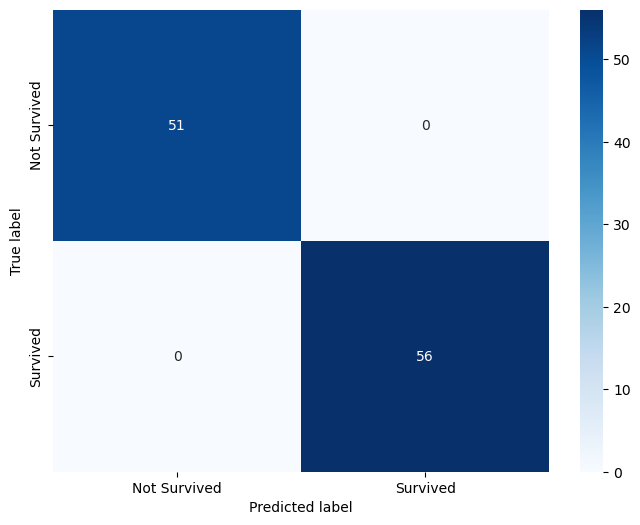

Traing Accuracy:  100.0
Testing Accuracy:  100.0
F1-Score:  100.0
Recall Score:  100.0
Precision Score:  100.0
Cross validation Score:  100.0  &  100.0


In [81]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion="gini",splitter="best")
dc.fit(a_train,b_train)
train=dc.score(a_train,b_train)*100
test=dc.score(a_test,b_test)*100
f1=f1_score(b_test,dc.predict(a_test))*100
recall=recall_score(b_test,dc.predict(a_test))*100
precision=precision_score(b_test,dc.predict(a_test))*100
conf_matrix=confusion_matrix(b_test,dc.predict(a_test))
cv=cross_val_score(DecisionTreeClassifier(criterion="gini",splitter="best"),inp,out,cv=2)*100

print("Decision Tree Classifier: ")
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Not Survived","Survived"],yticklabels=["Not Survived","Survived"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
print("Traing Accuracy: ",train)
print("Testing Accuracy: ",test)
print("F1-Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("Cross validation Score: ",min(cv)," & ",max(cv))


Random Forest Classifier: 


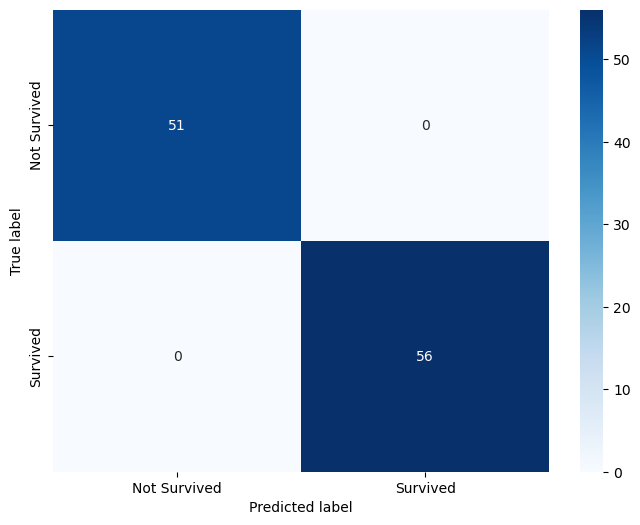

Traing Accuracy:  100.0
Testing Accuracy:  100.0
F1-Score:  100.0
Recall Score:  100.0
Precision Score:  100.0
Cross validation Score:  100.0  &  100.0


In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion="gini", n_estimators=100)
rfc.fit(a_train,b_train)
train=rfc.score(a_train,b_train)*100
test=rfc.score(a_test,b_test)*100
f1=f1_score(b_test,rfc.predict(a_test))*100
recall=recall_score(b_test,rfc.predict(a_test))*100
precision=precision_score(b_test,rfc.predict(a_test))*100
conf_matrix=confusion_matrix(b_test,rfc.predict(a_test))
cv=cross_val_score(RandomForestClassifier(criterion="gini", n_estimators=100),inp,out,cv=2)*100

print("Random Forest Classifier: ")
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Not Survived","Survived"],yticklabels=["Not Survived","Survived"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
print("Traing Accuracy: ",train)
print("Testing Accuracy: ",test)
print("F1-Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("Cross validation Score: ",min(cv)," & ",max(cv))

Support Vector Classifier: 


C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


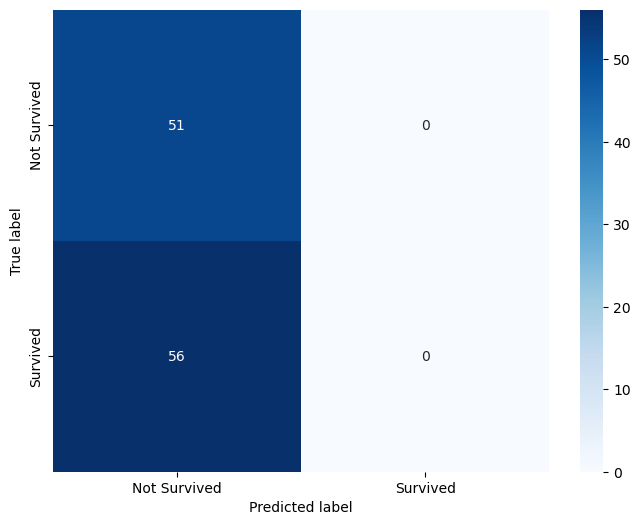

Traing Accuracy:  50.588235294117645
Testing Accuracy:  47.66355140186916
F1-Score:  0.0
Recall Score:  0.0
Precision Score:  0.0
Cross validation Score:  45.11278195488722  &  48.1203007518797


In [83]:
from sklearn.svm import SVC
svc=SVC(kernel="rbf")
svc.fit(a_train,b_train)
train=svc.score(a_train,b_train)*100
test=svc.score(a_test,b_test)*100
f1=f1_score(b_test,svc.predict(a_test))*100
recall=recall_score(b_test,svc.predict(a_test))*100
precision=precision_score(b_test,svc.predict(a_test))*100
conf_matrix=confusion_matrix(b_test,svc.predict(a_test))
cv=cross_val_score(SVC(kernel="rbf"),inp,out,cv=2)*100

print("Support Vector Classifier: ")
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Not Survived","Survived"],yticklabels=["Not Survived","Survived"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
print("Traing Accuracy: ",train)
print("Testing Accuracy: ",test)
print("F1-Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("Cross validation Score: ",min(cv)," & ",max(cv))

K Neighbour Classifier: 


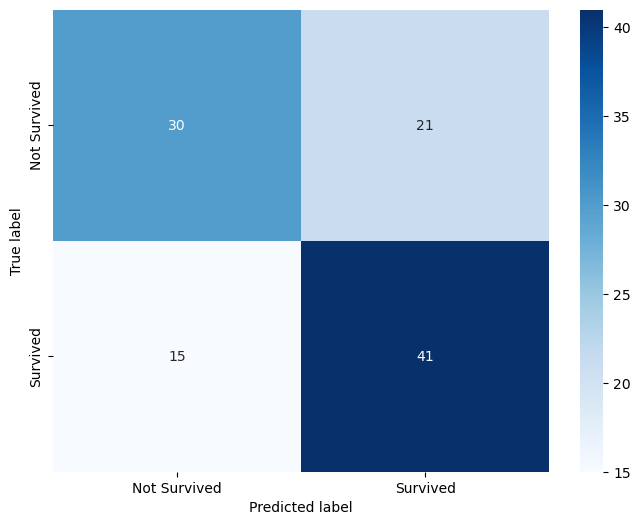

Traing Accuracy:  78.11764705882352
Testing Accuracy:  66.35514018691589
F1-Score:  69.4915254237288
Recall Score:  73.21428571428571
Precision Score:  66.12903225806451
Cross validation Score:  63.1578947368421  &  63.53383458646616


In [85]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(a_train,b_train)
train=knc.score(a_train,b_train)*100
test=knc.score(a_test,b_test)*100

f1=f1_score(b_test,knc.predict(a_test))*100
recall=recall_score(b_test,knc.predict(a_test))*100
precision=precision_score(b_test,knc.predict(a_test))*100
conf_matrix=confusion_matrix(b_test,knc.predict(a_test))
cv=cross_val_score(KNeighborsClassifier(n_neighbors=5),inp,out,cv=2)*100

print("K Neighbour Classifier: ")
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Not Survived","Survived"],yticklabels=["Not Survived","Survived"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
print("Traing Accuracy: ",train)
print("Testing Accuracy: ",test)
print("F1-Score: ",f1)
print("Recall Score: ",recall)
print("Precision Score: ",precision)
print("Cross validation Score: ",min(cv)," & ",max(cv))

# Output Prediction

In [88]:
Pclass=int(input("Enter the passenger Class 1/2/3 : "))
Sex=input("Enter the Gender: ")
Age=float(input("Enter Passenger Age: "))
SibSp=int(input("Enter the Number of Sibling or Spouse: "))
Parch=int(input("Enter the Number of Parent or child: "))
Ticket=int(input("Enter the Ticket Number: "))
Fare=float(input("Enter the Ticket fare: "))
Age_Group=input("Enter the Age Group Child/Teenage/Young/Mid-Age/Senior : ")
Family=int(input("Enter the Number of Family Member on board: "))
user_data=[Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Age_Group,Family]
feature=le.fit_transform(user_data)
prediction=dc.predict([feature])
if prediction==0:
    print("We are extremely Sorry but Passenger Not Survived")
elif prediction==1:
    print("Congratulation Passenger Survived")
    

Enter the passenger Class 1/2/3 : 3
Enter the Gender: female
Enter Passenger Age: 47.0
Enter the Number of Sibling or Spouse: 1
Enter the Number of Parent or child: 0
Enter the Ticket Number: 363272
Enter the Ticket fare: 7.0
Enter the Age Group Child/Teenage/Young/Mid-Age/Senior : Mid-Age
Enter the Number of Family Member on board: 1
We are extremely Sorry but Passenger Not Survived


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
x_predict =rfc.predict(a_test)
predicted_df = {'predicted_values': x_predict,'original_values': b_test}
print(pd.DataFrame(predicted_df).head(10))
print('')
print('Here O = not survived and 1 = survived')

     predicted_values  original_values
6                   1                1
488                 1                1
104                 1                1
486                 1                1
448                 1                1
222                 1                1
237                 0                0
433                 1                1
347                 1                1
72                  1                1

Here O = not survived and 1 = survived
